In the previous program, we solved the two-site Ising model.  In particular, we did the following:

1) Find the 4x4 matrix for H, as a function of the parameter g=h/J

2) Find the eigenvalues and eigenstates of the Hamiltonian for a range of values of g

3) Find expectation values in the ground state for various interesting operators

Here we do the same but with an arbitrary number of sites in the model.  (In practice the number of sites cannot be larger than about 10, but our programs would work in principle for any size if you had unlimited computational resources.)

Our first step is to write a function that finds the matrix for H given the number of sites $N$.  However, as $N$ becomes large even finding these matrices will take a very long time, and if we use a range of parameters $g$ we do not want to have to reconstruct it each time.  We will therefore write two functions:

```ZZ(N)```: returns the $2^N \times 2^N$ matrix for $\sum_i \sigma^z_i \sigma^z_{i+1}$

and

```X(N)```: returns the $2^N \times 2^N$ matrix for $\sum_i \sigma^x_i$

We can run these functions for a given $N$ and store the results (variables ```ZZ_N``` and ```X_N```, then for each $g$ we just compute ```H = -ZZ_N - g*X_N```.

**WARNING: do not use N > 10 during class as you may crash your computer.**  If you want your programs to also run very quickly, you should stick to $N \leq 8$.

# Preliminaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Sx = np.array( [[0,1],[1,0]] )
Sz = np.array( [[1,0],[0,-1]] )
Id = np.array( [[1,0],[0,1]] )

# Finding the matrices

## ZZ matrix

First I demonstrate three different ways of finding the matrix for the $\sigma^z \sigma^z$ terms, as discussed in the lecture

**Method 1: Kronecker product**

In [ ]:
# A test of Kronecker product using numpy

np.kron(Sz, Sx)

In [2]:
def ZZ(N):
    """
    Input: N is the number of sites in a 1D Ising model
    Output: Matrix for sum of Sz Sz terms, NOT including the overall minus sign
    
    Computed using Kronecker product method
    """
    ZZ = np.zeros( (2**N,2**N) , dtype = int) # Create matrix of all zeros
    # Add Sz Sz terms one by one, from left to right
    for i in range(N-1):
        operators = [Id]*i + [Sz,Sz] + [Id]*(N-2-i) # A list of all the operators in this term 
        term = operators[0]
        for op in operators[1:]: # iterate through all elements after the first one, which was used to start the list
            term = np.kron(term, op)
        # Add result for this term to the matrix
        ZZ += term
    return ZZ

In [ ]:
ZZ(3)

**Method 2: Column by column**

In [4]:
def d2b(i,N):
    b = np.zeros(N, dtype = int)
    for j in range(N):
        b[j] = (i//2**(N-1-j))%2
    return b

def d2b_v2(i,N):
    b = np.array( [ (i//2**(N-1-j))%2 for j in range(N) ] )
    return b

def b2d(b):
    N = len(b)
    d = np.sum( [ b[i]*2**(N-1-i) for i in range(N) ] )
    return d

def ZZ_v2(N):
    """
    Input: N is the number of sites in a 1D Ising model
    Output: Matrix for sum of Sz Sz terms, NOT including the overall minus sign
    
    Computed using Column-by-column method
    """
    ZZ = np.zeros( (2**N,2**N) , dtype = int)
    for col in range(2**N):
        b = d2b_v2(col, N)
        for j in range(N-1):
            coeff = (-1)**( b[j] + b[j+1] )  
            new_b = b.copy() # Without the copy function, if you change new_b it will also change b                      
            row = b2d(new_b)
            ZZ[row, col] += coeff
    return ZZ

In [ ]:
ZZ_v2(3)

**Method 3: Use knowledge that the operator is diagonal**

In [3]:
def ZZ_v3(N):
    """
    Input: N is the number of sites in a 1D Ising model
    Output: Matrix for sum of Sz Sz terms, NOT including the overall minus sign
    
    Computed using knowledge that operator is diagonal
    """
    ZZ_diag = np.zeros(2**N, dtype = int)
    for col in range(2**N):
        b = d2b(col,N)
        val = 0
        for j in range(N-1):
            val += (-1)**(b[j] + b[j+1])
        ZZ_diag[col] = val
    ZZ = np.diag(ZZ_diag)
    return ZZ

In [ ]:
ZZ_v3(3)

**Test that all three agree for some larger values of $N$**

In [ ]:
N = 8
print(np.linalg.norm(ZZ(N)-ZZ_v2(N)))
print(np.linalg.norm(ZZ(N)-ZZ_v3(N)))

## X matrix

Using the above programs for the ZZ matrix as a guide, write your own programs to find the matrix for the sum of $S^x$, using both method 1 (Kronecker product) and method 2 (column-by-column).  Hint: you can reuse the code from above, changing just a few lines.  Be careful about the number of terms in your for loop!

I provide the correct matrices for N=2 and 3 so you can check your program's output

**Method 1: Kronecker product**

In [5]:
# Version 1: Kronecker product

def X(N):
    """
    Input: N is the number of sites in a 1D Ising model
    Output: Matrix for sum of Sx terms, NOT including the overall minus sign or the factor of g
    
    Computed using Kronecker product method
    """
    # Your code here
    X = np.zeros( (2**N,2**N), dtype = int) # Create matrix of all zeros
    # Add Sx terms one by one, from left to right
    for i in range(N):
        operators = [Id]*i + [Sx] + [Id]*(N-1-i) # A list of all the operators in this term # <- Change this line
        term = operators[0]
        for op in operators[1:]: # iterate through all elements after the first one, which was used to start the list
            term = np.kron(term, op)
        # Add result for this term to the matrix
        X += term
    return X

In [ ]:
# For testing the output
correct_X_2 = np.array([[0, 1, 1, 0],
                        [1, 0, 0, 1],
                        [1, 0, 0, 1],
                        [0, 1, 1, 0]])
correct_X_3 = np.array([[0, 1, 1, 0, 1, 0, 0, 0],
                        [1, 0, 0, 1, 0, 1, 0, 0],
                        [1, 0, 0, 1, 0, 0, 1, 0],
                        [0, 1, 1, 0, 0, 0, 0, 1],
                        [1, 0, 0, 0, 0, 1, 1, 0],
                        [0, 1, 0, 0, 1, 0, 0, 1],
                        [0, 0, 1, 0, 1, 0, 0, 1],
                        [0, 0, 0, 1, 0, 1, 1, 0]])
error_2 = np.linalg.norm(X(2) - correct_X_2)
error_3 = np.linalg.norm(X(3) - correct_X_3)
print(error_2,error_3)

**Method 2: Column by column**

In [5]:
# Version 2: Column-by-column

def X_v2(N):
    """
    Input: N is the number of sites in a 1D Ising model
    Output: Matrix for sum of Sx terms, NOT including the overall minus sign or the factor of g
    
    Computed using Column-by-column method
    """
    # Your code here
    X = np.zeros( (2**N,2**N), dtype = int )
    for col in range(2**N):
        b = d2b_v2(col, N)
        for j in range(N):
            coeff = 1
            new_b = b.copy()
            new_b[j] = 1-new_b[j] # Flip the spin on site j #(new_b[j]+1)%2
            row = b2d(new_b)
            X[row, col] += coeff
    return X

In [ ]:
# Testing
error_2 = np.linalg.norm(X_v2(2) - correct_X_2)
error_3 = np.linalg.norm(X_v2(3) - correct_X_3)
print(error_2,error_3)

** Compare the methods for large N**

In [7]:
N=6
np.linalg.norm(X(N)-X_v2(N))

0.0

# Solving the model

We now use these matrices to solve the Ising model!

**Energy spectrum**

The first step is to just look at the energy eigenspectrum.  I provide the program here.  There are parameters for you to select:

```N```: the number of sites

```num_pts```: how many values of the parameter ```g``` to use, in the interval from 0 to 2

```show_lowest```: if the value is ```False``` all $2^N$ eigenvalues will be plotted.  If it is a positive integer $n$, the lowest $n$ eigenvalues will be shown (or $2^N$ if that is less than $n$).

```gs_at_0```: if ```False``` the actual energies will be plotted; if ```True```, for each $g$ the ground state energy will be subtracted from all eigenvalues, so the plot is of "relative energy" above the ground state.

```per_site```: if ```True```, all energy eigenvalues will be divided by ```N``` to give the intensive quantity energy/site 

I recommend exploring these different options

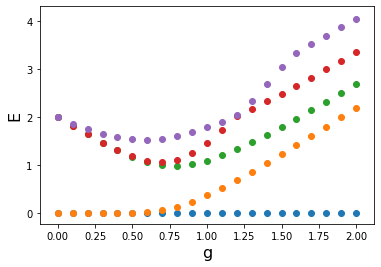

In [10]:
# Parameters
N = 8
num_pts = 21
show_lowest = 5
gs_at_0 = True
per_site = False

# Generate X and ZZ matrices using the fastest methods
X = X_v2(N) 
ZZ = ZZ_v3(N)

# Function to get H from these stored matrices
def get_H(g):
    return -ZZ - g*X

# Values of g to use in calculating/plotting
gs = np.linspace(0,2,num_pts)

# Create an empty table to store the results:
energies = np.zeros( (2**N,num_pts) )
energies[:,:] = np.nan 

for g_index, g in enumerate(gs): 
    H = get_H(g)
    e, v = np.linalg.eigh(H) 
    inds = np.argsort(e)
    e = e[inds]
    v = v[:, inds]
    
    energies[:,g_index] = e
    
if per_site:
    energies /= N
if gs_at_0:
    gs_es = energies[0].copy()
    for i in range(2**N):
        energies[i] -= gs_es

f, a = plt.subplots()
max_ind = 2**N if not show_lowest else show_lowest
for row in range(max_ind): 
    a.scatter(gs, energies[row])
a.set_xlabel('g', fontsize = 16);
a.set_ylabel('E', fontsize = 16);

**Expectation values**

Next we want to look at some physical properties, as measured by expectation values and correlation functions in the ground state.  In particular, we will look at:

- Average of $\langle \sigma^x_i \rangle$, which is really just the expectation value of the $h$ term in the model

- Correlation function of $z$-component of spin on the first and last sites, $\langle \sigma^z_0 \sigma^z_{N-1}\rangle$, which measures whether there is long-range ferromagnetic order

I provide the outlines of a program for doing these calculations, but you need to fill in the actual computation of the expectation values.

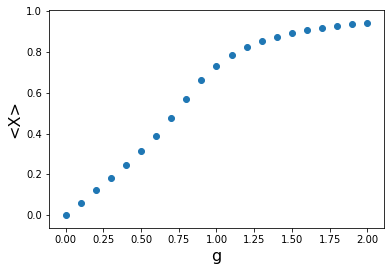

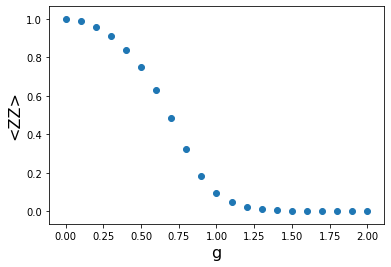

In [15]:
# Parameters
N = 10
num_pts = 21

# Generate X and ZZ matrices using the fastest methods
X = X_v2(N) 
ZZ = ZZ_v3(N)

# Function to get H from these stored matrices
def get_H(g):
    return -ZZ - g*X

# Values of g to use in calculating/plotting
gs = np.linspace(0,2,num_pts)

# Generate a matrix for each operator whose expectation value we want to measure.  
#  (Hint: you already basically have the one for x!) 

def get_ZZ_end_site_matrix(N):
    """
    For N sites, return the matrix for the operator \sigma^z_0 \otimes Id \otimes ... \otimes Id \otimes \sigma^z_{N-1}
    """
    # Your code here
    ZZ_ends = np.zeros( 2**N, dtype = int)
    for i in range(2**N):
        b = d2b(i, N)
        ZZ_ends[i] = (-1)**(b[0]+b[-1])
    return np.diag(ZZ_ends)

ZZ_ends = get_ZZ_end_site_matrix(N)
X_avg = X/N


# For storing the results
X_avg_vals = np.zeros(num_pts)
ZZ_ends_vals = np.zeros(num_pts)
XX_ends_vals = np.zeros(num_pts)

# Do the calculations
for g_index, g in enumerate(gs):
    H = get_H(g)
    e, v = np.linalg.eigh(H)
    indices = np.argsort(e)
    e = e[indices] 
    v = v[:, indices] 
    
    X_avg_vals[g_index] = v[:,0].conj().transpose() @ X_avg @ v[:,0]
    ZZ_ends_vals[g_index] = v[:,0].conj().transpose() @ ZZ_ends @ v[:,0]
    
# Make plots
for (values, label) in [(X_avg_vals, '<X>'), (ZZ_ends_vals, '<ZZ>')]:
    f,a = plt.subplots()
    a.scatter(gs, values)
    a.set_xlabel('g', fontsize = 16);
    a.set_ylabel(label, fontsize = 16);

# Comparing different N

In condensed matter physics, the goal is to study very large systems, with many particles (on the order of $10^{23}$).  So when we study small systems, as we've done going to just 10-ish sites in this case, it is important to think about what would happen if we made $N$ larger.  To do this, we plot the results for many values of $N$ together.  

Here we make four figures comparing the results as we change $N$:
- The energy gap between the ground state and the first excited state
- The energy gap between the first and second excited states
- The expectation value of the average of $\sigma^x$
- The correlation function of $\langle \sigma^z \sigma^z\rangle$ on the first and last sites

Again, you should fill in some details as above

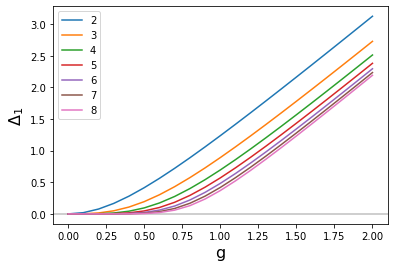

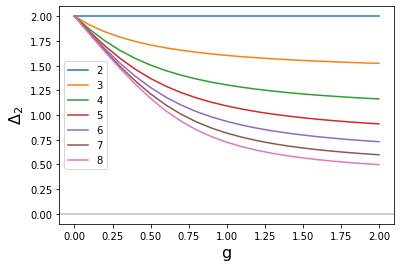

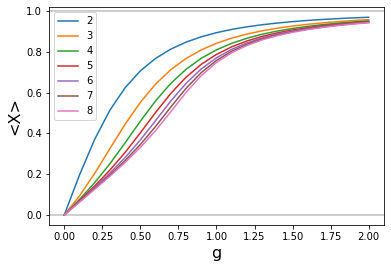

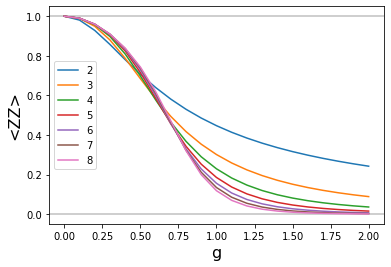

In [16]:
Ns = range(2,9) # Includes 2 through 8
num_pts = 21
gs = np.linspace(0,2,num_pts)

# Arrays to store results for all N and g
first_E_gap = np.zeros( (len(Ns),num_pts) )
second_E_gap = np.zeros( (len(Ns),num_pts) )
ZZ_ends_vals = np.zeros( (len(Ns),num_pts) )
X_avg_vals = np.zeros( (len(Ns),num_pts) )

# Loop through values of N
for N_idx, N in enumerate(Ns):
    X = X_v2(N)
    ZZ = ZZ_v3(N)
    X_avg = X/N
    ZZ_ends = get_ZZ_end_site_matrix(N)
    
    for g_index, g in enumerate(gs):
        H = -ZZ - g*X
        e, v = np.linalg.eigh(H)
        indices = np.argsort(e)
        e = e[indices] 
        v = v[:, indices] 

        first_E_gap[N_idx, g_index] = e[1]-e[0]
        second_E_gap[N_idx, g_index] = e[2]-e[1]
        ZZ_ends_vals[N_idx, g_index] = v[:,0].conj().transpose() @ ZZ_ends @ v[:,0]
        X_avg_vals[N_idx, g_index] = v[:,0].conj().transpose() @ X_avg @ v[:,0]
        
# Make plots
for (values, label) in [(first_E_gap,'$\Delta_1$'),(second_E_gap,'$\Delta_2$'),(X_avg_vals, '<X>'),(ZZ_ends_vals, '<ZZ>')]:
    f,a = plt.subplots()
    for N_idx, N in enumerate(Ns):
        a.plot(gs, values[N_idx], label = N) # 'label' option will let us make a legend
    a.set_xlabel('g', fontsize = 16);
    a.set_ylabel(label, fontsize = 16);
    a.legend()
    a.axhline(0, c='gray', zorder = 0, alpha=0.5) # Makes a horizontal line to make results easier to understand
    if label in ['<X>','<ZZ>']: a.axhline(1, c='gray', zorder=0, alpha=0.5)

From these calculations you can get a sense of how som behaviors seem to be converged already at $N\approx 10$ while others are not.  To get a better sense, you can make plots where $g$ is fixed and you plot the values versus $1/N$.  Since we stored all the results above, this doesn't require any extra calculation.  Here is an example:

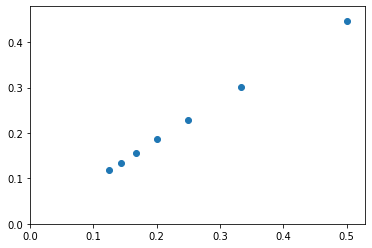

In [22]:
# Which g to plot
g_val = 1.0

# Find the index in the output array for this g (will give an error if this g is not in the set that was computed)
g_idx = np.where(np.abs(gs - g_val) < 10**-10)

# Plot vs 1/N
f,a = plt.subplots()
a.scatter(1/np.array(Ns), ZZ_ends_vals[:,g_idx])
a.set_xlim(left=0);
a.set_ylim(bottom=0);